In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import keras

In [2]:
os.sys.path

['',
 'C:\\Users\\admin\\Anaconda3\\python36.zip',
 'C:\\Users\\admin\\Anaconda3\\DLLs',
 'C:\\Users\\admin\\Anaconda3\\lib',
 'C:\\Users\\admin\\Anaconda3',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\admin\\.ipython']

In [3]:
seed =128
rng = np.random.RandomState(seed)

In [4]:
os.chdir("C:\\Users\\admin\\Desktop")

In [5]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir,'data')

In [6]:
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
print(train)

        filename  label
0          0.png      4
1          1.png      9
2          2.png      1
3          3.png      7
4          4.png      3
5          5.png      9
6          6.png      4
7          7.png      9
8          8.png      3
9          9.png      4
10        10.png      2
11        11.png      3
12        12.png      6
13        13.png      6
14        14.png      0
15        15.png      4
16        16.png      8
17        17.png      7
18        18.png      9
19        19.png      5
20        20.png      3
21        21.png      9
22        22.png      1
23        23.png      9
24        24.png      6
25        25.png      8
26        26.png      9
27        27.png      5
28        28.png      7
29        29.png      3
...          ...    ...
48970  48970.png      7
48971  48971.png      5
48972  48972.png      0
48973  48973.png      1
48974  48974.png      4
48975  48975.png      1
48976  48976.png      7
48977  48977.png      5
48978  48978.png      6
48979  48979.png

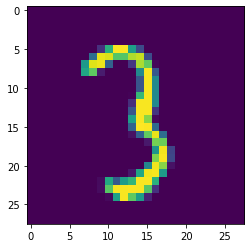

In [7]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'Images','Train',img_name)
img = cv2.imread(filepath,0)
plt.imshow(img)
plt.show()

In [8]:
#print(img)

In [8]:
np.shape(img)

(28, 28)

In [9]:
np.ndim(img)

2

In [10]:
temp = []
for image in train.filename:
    filepath = os.path.join(data_dir,'Images','Train',image)
    img = cv2.imread(filepath,0)
    temp.append(img)

X_train = np.array(temp).reshape(49000,28,28,1)
y_train = list(train['label'])

# DATA AUGMENTATION

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = [0.1,0.2])
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir=os.path.join(data_dir,'Images','Train'), save_prefix='aug', save_format='png'):
    y_train.append(y_batch)

In [12]:
print(len(temp))

49000


In [21]:
train_x = np.stack(temp)

In [22]:
(train_x) = train_x.reshape(-1,784).astype('float32')

In [23]:
from keras.utils import to_categorical
y_train = to_categorical(train['label'],num_classes = 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [24]:
split_num = int(len(y_train)*0.7)
train_x,val_x = train_x[:split_num],train_x[split_num:]
train_y,val_y = y_train[:split_num],y_train[split_num:]

# NEURAL NETWORKS WITH 2 LAYERS

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model = Sequential()
model.add(Dense(50,activation = 'relu',input_dim = 784))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_x,train_y,epochs = 110,batch_size = 128)

Epoch 1/110
34300/34300 [==============================] - 2s 53us/step - loss: 7.8684 - acc: 0.5060
Epoch 2/110
34300/34300 [==============================] - 1s 32us/step - loss: 6.8184 - acc: 0.5741
Epoch 3/110
34300/34300 [==============================] - 1s 33us/step - loss: 6.7352 - acc: 0.5801
Epoch 4/110
34300/34300 [==============================] - 1s 33us/step - loss: 6.6807 - acc: 0.5836
Epoch 5/110
34300/34300 [==============================] - 1s 33us/step - loss: 6.6066 - acc: 0.5883
Epoch 6/110
34300/34300 [==============================] - 1s 34us/step - loss: 5.4537 - acc: 0.6576
Epoch 7/110
34300/34300 [==============================] - 1s 36us/step - loss: 4.2735 - acc: 0.7314
Epoch 8/110
34300/34300 [==============================] - 1s 34us/step - loss: 4.1108 - acc: 0.7421
Epoch 9/110
34300/34300 [==============================] - 1s 32us/step - loss: 3.9522 - acc: 0.7527
Epoch 10/110
34300/34300 [==============================] - 1s 32us/step - loss: 3.9651 - a

34300/34300 [==============================] - 1s 30us/step - loss: 0.4953 - acc: 0.9685
Epoch 82/110
34300/34300 [==============================] - 1s 31us/step - loss: 0.5001 - acc: 0.9682
Epoch 83/110
34300/34300 [==============================] - 1s 33us/step - loss: 0.5248 - acc: 0.9666
Epoch 84/110
34300/34300 [==============================] - 1s 31us/step - loss: 0.5056 - acc: 0.9678
Epoch 85/110
34300/34300 [==============================] - 1s 31us/step - loss: 0.4782 - acc: 0.9696
Epoch 86/110
34300/34300 [==============================] - 1s 32us/step - loss: 0.5216 - acc: 0.9668
Epoch 87/110
34300/34300 [==============================] - 1s 33us/step - loss: 0.5285 - acc: 0.9663
Epoch 88/110
34300/34300 [==============================] - 1s 32us/step - loss: 0.5130 - acc: 0.9672
Epoch 89/110
34300/34300 [==============================] - 1s 31us/step - loss: 0.5068 - acc: 0.9677
Epoch 90/110
34300/34300 [==============================] - 1s 32us/step - loss: 0.5156 - acc: 

In [35]:
score = model.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 0s 15us/step
[0.7125819161392394, 0.9548299318754754]


# NEURAL NETWORKS WITH 4 LAYERS

In [38]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 784))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(10,activation = 'softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model1.fit(train_x,train_y,epochs = 100,batch_size = 128)

Epoch 1/100
34300/34300 [==============================] - 2s 67us/step - loss: 6.6314 - acc: 0.5521
Epoch 2/100
34300/34300 [==============================] - 1s 38us/step - loss: 3.2271 - acc: 0.7538
Epoch 3/100
34300/34300 [==============================] - 1s 36us/step - loss: 1.5609 - acc: 0.8573
Epoch 4/100
34300/34300 [==============================] - 1s 36us/step - loss: 0.4776 - acc: 0.9260
Epoch 5/100
34300/34300 [==============================] - 1s 37us/step - loss: 0.3153 - acc: 0.9418
Epoch 6/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.2508 - acc: 0.9489
Epoch 7/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.2023 - acc: 0.9556
Epoch 8/100
34300/34300 [==============================] - 1s 39us/step - loss: 0.1740 - acc: 0.9598
Epoch 9/100
34300/34300 [==============================] - ETA: 0s - loss: 0.1460 - acc: 0.965 - 1s 39us/step - loss: 0.1453 - acc: 0.9655
Epoch 10/100
34300/34300 [===========================

34300/34300 [==============================] - 1s 36us/step - loss: 0.0202 - acc: 0.9953
Epoch 81/100
34300/34300 [==============================] - 1s 36us/step - loss: 0.0220 - acc: 0.9950
Epoch 82/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.0133 - acc: 0.9971
Epoch 83/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.0201 - acc: 0.9954
Epoch 84/100
34300/34300 [==============================] - 1s 38us/step - loss: 0.0401 - acc: 0.9909
Epoch 85/100
34300/34300 [==============================] - 1s 38us/step - loss: 0.0170 - acc: 0.9955
Epoch 86/100
34300/34300 [==============================] - 1s 37us/step - loss: 0.0185 - acc: 0.9955
Epoch 87/100
34300/34300 [==============================] - 1s 36us/step - loss: 0.0168 - acc: 0.9959
Epoch 88/100
34300/34300 [==============================] - 1s 36us/step - loss: 0.0239 - acc: 0.9941
Epoch 89/100
34300/34300 [==============================] - 1s 38us/step - loss: 0.0226 - acc: 

In [39]:
score = model1.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 1s 47us/step
[0.3314332432853736, 0.96224489786187]


# NEURAL NETWORKS WITH DROPOUT REGULARIZATION

In [45]:
from keras.layers import Dropout
model2 = Sequential()
model2.add(Dense(50,activation = 'relu',input_dim = 784))
model2.add(Dropout(0.2))
model2.add(Dense(50,activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50,activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation = 'softmax'))
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model2.fit(train_x,train_y,epochs = 110,batch_size = 128)

Epoch 1/110
34300/34300 [==============================] - 3s 99us/step - loss: 9.4324 - acc: 0.3769
Epoch 2/110
34300/34300 [==============================] - 2s 55us/step - loss: 2.8605 - acc: 0.5569
Epoch 3/110
34300/34300 [==============================] - 2s 53us/step - loss: 1.2373 - acc: 0.6643
Epoch 4/110
34300/34300 [==============================] - 2s 55us/step - loss: 0.9782 - acc: 0.7359
Epoch 5/110
34300/34300 [==============================] - 2s 55us/step - loss: 0.8356 - acc: 0.7787
Epoch 6/110
34300/34300 [==============================] - 2s 56us/step - loss: 0.7497 - acc: 0.8034
Epoch 7/110
34300/34300 [==============================] - 2s 54us/step - loss: 0.6786 - acc: 0.8262
Epoch 8/110
34300/34300 [==============================] - 2s 55us/step - loss: 0.6248 - acc: 0.8383
Epoch 9/110
34300/34300 [==============================] - 2s 55us/step - loss: 0.5787 - acc: 0.8486
Epoch 10/110
34300/34300 [==============================] - 2s 55us/step - loss: 0.5556 - a

34300/34300 [==============================] - 2s 55us/step - loss: 0.1715 - acc: 0.9524
Epoch 82/110
34300/34300 [==============================] - 2s 56us/step - loss: 0.1703 - acc: 0.9538
Epoch 83/110
34300/34300 [==============================] - 2s 57us/step - loss: 0.1711 - acc: 0.9527
Epoch 84/110
34300/34300 [==============================] - 2s 56us/step - loss: 0.1668 - acc: 0.9545
Epoch 85/110
34300/34300 [==============================] - 2s 54us/step - loss: 0.1630 - acc: 0.9554
Epoch 86/110
34300/34300 [==============================] - 2s 56us/step - loss: 0.1677 - acc: 0.9535
Epoch 87/110
34300/34300 [==============================] - 2s 57us/step - loss: 0.1717 - acc: 0.9540
Epoch 88/110
34300/34300 [==============================] - 2s 53us/step - loss: 0.1585 - acc: 0.9566
Epoch 89/110
34300/34300 [==============================] - 2s 53us/step - loss: 0.1623 - acc: 0.9556
Epoch 90/110
34300/34300 [==============================] - 2s 56us/step - loss: 0.1654 - acc: 

In [46]:
score = model2.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 1s 63us/step
[0.22678488183791945, 0.9516326531423193]


# NEYRAL NETWORKS WITH HE INITIALIZATION

In [52]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 784,kernel_initializer = 'he_normal'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(10,activation = 'softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model1.fit(train_x,train_y,epochs = 100,batch_size = 128)

Epoch 1/100
34300/34300 [==============================] - 3s 91us/step - loss: 4.3844 - acc: 0.6932
Epoch 2/100
34300/34300 [==============================] - 2s 46us/step - loss: 1.3432 - acc: 0.8937
Epoch 3/100
34300/34300 [==============================] - 1s 41us/step - loss: 1.0106 - acc: 0.9163
Epoch 4/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.7961 - acc: 0.9310
Epoch 5/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.7023 - acc: 0.9391
Epoch 6/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.6006 - acc: 0.9435
Epoch 7/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.5253 - acc: 0.9496
Epoch 8/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.5109 - acc: 0.9508
Epoch 9/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.4363 - acc: 0.9569
Epoch 10/100
34300/34300 [==============================] - 2s 44us/step - loss: 0.3599 - a

34300/34300 [==============================] - 1s 41us/step - loss: 0.0387 - acc: 0.9920
Epoch 82/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.0279 - acc: 0.9940
Epoch 83/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.0147 - acc: 0.9970
Epoch 84/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.0208 - acc: 0.9961
Epoch 85/100
34300/34300 [==============================] - 1s 42us/step - loss: 0.0211 - acc: 0.9958
Epoch 86/100
34300/34300 [==============================] - 1s 41us/step - loss: 0.0239 - acc: 0.9946
Epoch 87/100
34300/34300 [==============================] - 1s 42us/step - loss: 0.0278 - acc: 0.9940
Epoch 88/100
34300/34300 [==============================] - 1s 40us/step - loss: 0.0205 - acc: 0.9956
Epoch 89/100
34300/34300 [==============================] - 1s 43us/step - loss: 0.0311 - acc: 0.9931
Epoch 90/100
34300/34300 [==============================] - 1s 43us/step - loss: 0.0222 - acc: 

In [53]:
score = model1.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 1s 54us/step
[0.32406309570179503, 0.959319728053346]


# NEURAL NETWORKS WITH BATCH NORMALIZATION

In [54]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 784,kernel_initializer = 'he_normal'))
model4.add(BatchNormalization())
model4.add(Dense(50,activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(50,activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(10,activation = 'softmax'))
model4.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model4.fit(train_x,train_y,epochs = 100,batch_size = 128)

Epoch 1/100
34300/34300 [==============================] - 5s 154us/step - loss: 0.5178 - acc: 0.8473
Epoch 2/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.1792 - acc: 0.9474
Epoch 3/100
34300/34300 [==============================] - 2s 62us/step - loss: 0.1261 - acc: 0.9627
Epoch 4/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0979 - acc: 0.9699
Epoch 5/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0797 - acc: 0.9757
Epoch 6/100
34300/34300 [==============================] - 2s 64us/step - loss: 0.0653 - acc: 0.9795
Epoch 7/100
34300/34300 [==============================] - 2s 64us/step - loss: 0.0544 - acc: 0.9833
Epoch 8/100
34300/34300 [==============================] - 2s 68us/step - loss: 0.0468 - acc: 0.9852
Epoch 9/100
34300/34300 [==============================] - 2s 65us/step - loss: 0.0403 - acc: 0.9869
Epoch 10/100
34300/34300 [==============================] - 2s 65us/step - loss: 0.0345 - 

34300/34300 [==============================] - 2s 63us/step - loss: 0.0080 - acc: 0.9970
Epoch 82/100
34300/34300 [==============================] - 2s 67us/step - loss: 0.0054 - acc: 0.9982
Epoch 83/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0031 - acc: 0.9990
Epoch 84/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0039 - acc: 0.9988
Epoch 85/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0029 - acc: 0.9992
Epoch 86/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0043 - acc: 0.9985
Epoch 87/100
34300/34300 [==============================] - 2s 62us/step - loss: 0.0041 - acc: 0.9986
Epoch 88/100
34300/34300 [==============================] - 2s 63us/step - loss: 0.0046 - acc: 0.9986
Epoch 89/100
34300/34300 [==============================] - 2s 66us/step - loss: 0.0055 - acc: 0.9980
Epoch 90/100
34300/34300 [==============================] - 2s 65us/step - loss: 0.0034 - acc: 

In [55]:
score = model4.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 1s 72us/step
[0.1721432804985314, 0.9699319729513052]
